# Applying for the test - visuals

In this notebook, let's try to visualize the relationship captured by the selected features of our model.

These are the variables that could be related to the amount of SHSAT applicants:

- Grade 8 ELA - All Students Tested
- Grade 8 Math - All Students Tested
- Percent Asian
- Percent Black

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# first dataframe
schools = pd.read_pickle('../data/pre/schools2016.pkl')
schools = schools.set_index('Location Code')

cols = [
    'Grade 8 ELA - All Students Tested',
    'Grade 8 Math - All Students Tested',
    'Percent Asian',
    'Percent Black',
]
schools = schools[cols]

# second dataframe
district5 = pd.read_csv('../data/raw/D5 SHSAT Registrations and Testers.csv')
district5 = district5.set_index('DBN')
district5 = district5[(district5['Year of SHST'] == 2016) & (district5['Grade level'] == 8)]

percentage = district5['Number of students who registered for the SHSAT'] / district5['Enrollment on 10/31']
percentage.name = 'Percentage of Students who registered for the SHSAT'

# join
df = schools.join(percentage, how='inner')

In [3]:
df.head()

,Grade 8 ELA - All Students Tested,Grade 8 Math - All Students Tested,Percent Asian,Percent Black,Percentage of Students who registered for the SHSAT
05M046,63,63,1.0,50.0,0.357143
05M123,56,60,2.0,52.0,0.290909
05M129,56,56,2.0,42.0,0.300000
05M148,64,40,0.0,74.0,0.116667
05M161,113,117,3.0,18.0,0.157895


In [4]:
from IPython.display import display

# remove outliers

col = df['Percentage of Students who registered for the SHSAT']

mean = col.mean()
sd = col.std()

print("Entries to remove:")
display(df[np.abs(col - mean) > 2 * sd])

df = df[np.abs(col - mean) <= 2 * sd]

Entries to remove:


,Grade 8 ELA - All Students Tested,Grade 8 Math - All Students Tested,Percent Asian,Percent Black,Percentage of Students who registered for the SHSAT
05M286,36,36,0.0,59.0,0.967742
84M726,84,84,1.0,56.0,0.967742


In [5]:
df.shape

(18, 5)

## Predictions

Just a clean modelling now:

In-train score: 0.6575830115879495
CV score: 0.3797925404414483


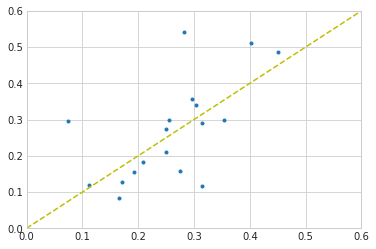

In [6]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_predict, LeaveOneOut

# prepare
d = df.copy()
labels = d.pop('Percentage of Students who registered for the SHSAT')

cols = [
    'Grade 8 ELA - All Students Tested',
    'Grade 8 Math - All Students Tested',
    'Percent Asian',
    'Percent Black',
]
d = d[cols]

# train
model = LassoCV(n_jobs=-1)
model.fit(d, labels)
predictions = cross_val_predict(model, d, labels, cv=LeaveOneOut())

# scores
print("In-train score:", model.score(d, labels))
print("CV score:",  r2_score(labels, predictions))

# plot
plt.plot(predictions, labels, '.')
plt.plot([0,1], [0,1], 'y--')
plt.xlim(0, 0.6)
plt.ylim(0, 0.6);

### Alternative prediction

In-train score: 0.5658475142282644
CV score: 0.40112805356728753


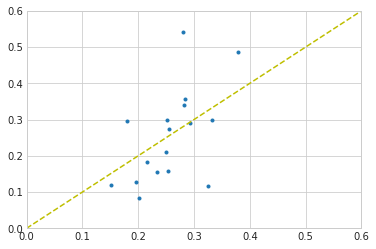

In [7]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_predict, LeaveOneOut

# prepare
d = df.copy()
labels = d.pop('Percentage of Students who registered for the SHSAT')

cols = [
    'Grade 8 Math - All Students Tested',
    'Percent Black',
]
d = d[cols]

# train
model = LassoCV(n_jobs=-1)
model.fit(d, labels)
predictions = cross_val_predict(model, d, labels, cv=LeaveOneOut())

# scores
print("In-train score:", model.score(d, labels))
print("CV score:",  r2_score(labels, predictions))

# plot
plt.plot(predictions, labels, '.')
plt.plot([0,1], [0,1], 'y--')
plt.xlim(0, 0.6)
plt.ylim(0, 0.6);

Reducing the number of variables, we got even better predictions. We might be overfitting, but by reducing the power of the model, we greatly reduce this possibility.

## Visualizing the important variables

In [8]:
# we shall put the outliers back in
# but let's just look at 'Grade 8 Math - All Students Tested' and 'Percent Black'

# first dataframe
schools = pd.read_pickle('../data/pre/schools2016.pkl')
schools = schools.set_index('Location Code')

cols = [
    'Grade 8 Math - All Students Tested',
    'Percent Black',
]
schools = schools[cols]

# second dataframe
district5 = pd.read_csv('../data/raw/D5 SHSAT Registrations and Testers.csv')
district5 = district5.set_index('DBN')
district5 = district5[(district5['Year of SHST'] == 2016) & (district5['Grade level'] == 8)]

percentage = 100.0 * district5['Number of students who registered for the SHSAT'] / district5['Enrollment on 10/31']
percentage.name = 'Percentage of Students who registered for the SHSAT'

# join
df = schools.join(percentage, how='inner')

df.head()

,Grade 8 Math - All Students Tested,Percent Black,Percentage of Students who registered for the SHSAT
05M046,63,50.0,35.714286
05M123,60,52.0,29.090909
05M129,56,42.0,30.000000
05M148,40,74.0,11.666667
05M161,117,18.0,15.789474


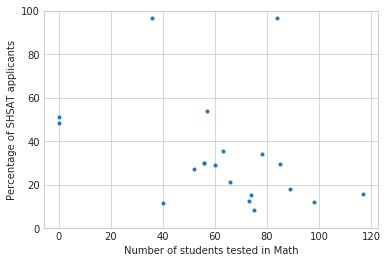

In [9]:
plt.plot(df['Grade 8 Math - All Students Tested'], df['Percentage of Students who registered for the SHSAT'], '.')
plt.ylim(0, 100)
plt.xlabel("Number of students tested in Math")
plt.ylabel("Percentage of SHSAT applicants");

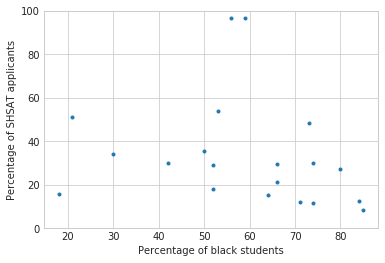

In [10]:
plt.plot(df['Percent Black'], df['Percentage of Students who registered for the SHSAT'], '.')
plt.ylim(0, 100)
plt.xlabel("Percentage of black students")
plt.ylabel("Percentage of SHSAT applicants");

For both variables, there seems to be a vague negative correlation.

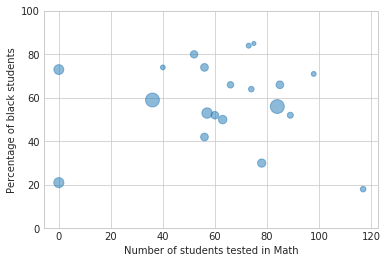

In [11]:
plt.scatter(df['Grade 8 Math - All Students Tested'], df['Percent Black'], s=df['Percentage of Students who registered for the SHSAT'] * 2, alpha=0.5)
plt.ylim(0, 100)
plt.xlabel("Number of students tested in Math")
plt.ylabel("Percentage of black students");

Bigger percentages seem to appear to the lower left region of the screen. This proves that, for this portion of the dataset, being black and taking the state Math test both reduce the chance you will apply for the SHSAT.

Also note that the two big balls are outlier schools (where almost everyone applied for the SHSAT).